In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import norm
import random
import math

In [3]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

[0.002 0.024 0.085 0.215 0.291 0.306 0.354 0.365 0.372 0.371 0.493 0.466
 0.565 0.554 0.5   0.61  0.552 0.532 0.503 0.351 0.367 0.345 0.266 0.237
 0.201 0.169 0.143 0.147 0.107 0.08  0.075 0.058 0.056 0.039 0.027 0.019
 0.03  0.028 0.011 0.02  0.013 0.017 0.008 0.005 0.005 0.002 0.001 0.005
 0.001 0.002 0.004 0.    0.    0.    0.001 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ] [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  

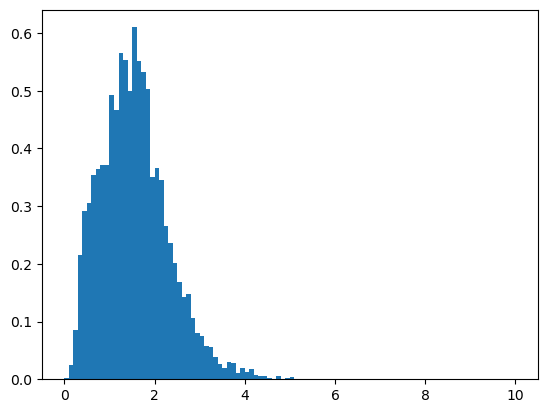

In [4]:
n, bins, patches = plt.hist(z, bins=np.linspace(0,10,101), density=True)
print(n, bins)

In [5]:
N = 10000
ymax = np.max(n)
random_z = np.random.uniform(0,10,N)
y = np.random.uniform(0,ymax,N)

In [6]:
#plt.scatter(random_z,y, s=0.5)

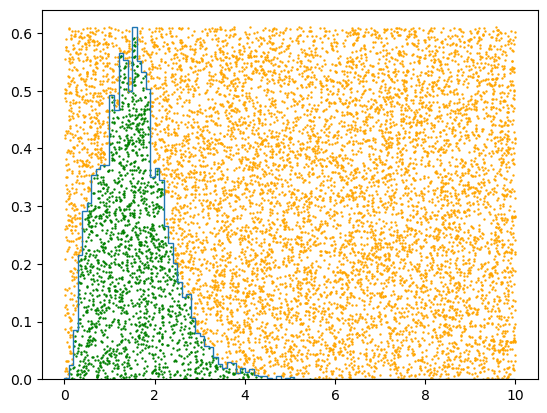

In [7]:
index = np.searchsorted(bins, random_z) -1 #restituisce array con valore dell'indice del bin in cui deve andare (-1 per far tornare gli indici del bin)
good_z = random_z[y <= n[index]] #seleziono solo i valori di y che per il dato random_z siano <= dell'altezza del bin in cui cade random_z
bad_z = random_z[y > n[index]]
good_y = y[y <= n[index]]
bad_y = y[y > n[index]]

plt.hist(z, bins=np.linspace(0,10,101), density=True, histtype='step')
plt.scatter(good_z,good_y,s=0.5, color='green')
plt.scatter(bad_z, bad_y, s= 0.5, color='orange')

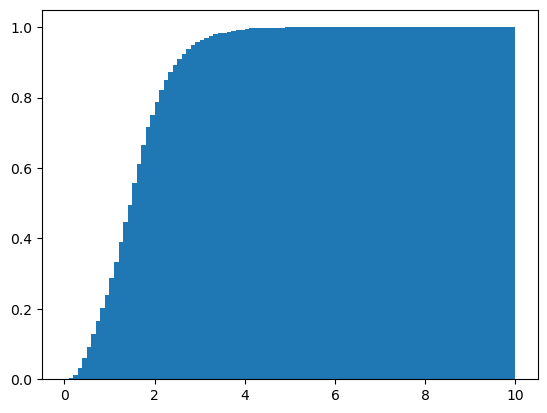

In [8]:
n, bins, patches = plt.hist(z, bins=np.linspace(0,10,101), density=True, cumulative=True)

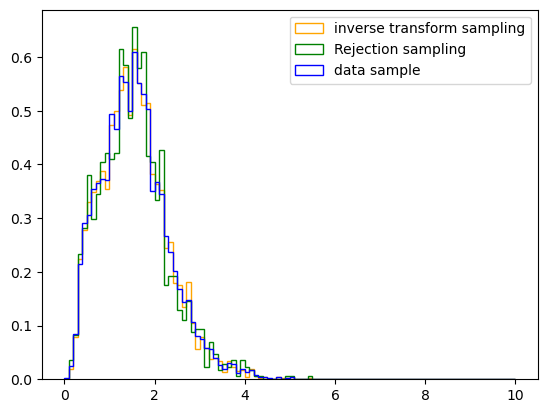

In [9]:
y_c = np.random.uniform(0,1,N)
index_yc = np.searchsorted(n,y_c)
true_yc = np.random.uniform(bins[index_yc], bins[index_yc+1])

plt.hist(true_yc, bins=np.linspace(0,10,101), density=True, histtype='step', color='orange', label='inverse transform sampling')
plt.hist(good_z, bins=np.linspace(0,10,101), density=True, histtype='step', color='green', label='Rejection sampling')
plt.hist(z, bins=np.linspace(0,10,101), density=True, histtype='step', color='blue', label='data sample')
plt.legend()
plt.show()

In [58]:
import astropy
astropy.cosmology.Planck18

FlatLambdaCDM(name='Planck18', H0=<Quantity 67.66 km / (Mpc s)>, Om0=0.30966, Tcmb0=<Quantity 2.7255 K>, Neff=3.046, m_nu=<Quantity [0.  , 0.  , 0.06] eV>, Ob0=0.04897)

at the beginning (lower redshift) the distribution of quasars follows the histogram (because i can se all af them) but at higer redshitd starts to drop because I can't see all of them (very difficult)